# Divide a Reduced and NORMED sample set into Clusters

Here, we reduce the sample set to samples for which $g_{BB}=g_{CC}=0$ so that only the parameters $g_{AB}$, $g_{AC}$ and $g_{BC}$ can vary as done in *red_sample_v2....ipynb*. But unlike in the previous version we use a different sample set. In this sample set, each correlation matrix is **normalized** so that we neglect the strength of correlation and focus only on the patterns.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

import helper_fcts


## 1. Reduce the sample set

Filter data according to $g_{BB}=g_{CC}=0$.
For simplification, we exclude parameter combinations, where the correlation-function becomes zero everywhere, e.g., when $g_{AB} = g_{AC}=g_{BC}=0$.

In [3]:
df_pca = pd.read_pickle('df_main_normed_std_pca_50.p')

mask_gBB0_gCC0 = (
    (df_pca.loc[:, 'gBB'] == 0) &
    (df_pca.loc[:, 'gCC'] == 0)
)

mask_gAB0_gAC0_gBC0 = (
    (df_pca.loc[:, 'gAB'] == 0) &
    (df_pca.loc[:, 'gAC'] == 0) &
    (df_pca.loc[:, 'gBC'] == 0)
)

mask = mask_gBB0_gCC0 & ~mask_gAB0_gAC0_gBC0

df_red = df_pca.loc[mask, :].copy()


features = df_red.iloc[:, 6:]

# combine parameters
df_red.loc[:, 'gAB * gAC'] = df_red.loc[:, 'gAB'] * df_red.loc[:, 'gAC']

# number of samples:
df_red.shape

(1486, 57)

In [4]:
print(df_pca.loc[:, 'gBB'].unique())
print(df_pca.loc[:, 'gCC'].unique())
print(df_pca.loc[:, 'gAB'].unique())
print(df_pca.loc[:, 'gAC'].unique())
print(df_pca.loc[:, 'gBC'].unique())
df_pca.shape

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.  -0.5  0.5]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.  -0.5  0.5]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.  -0.5  0.5]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.  -0.5  0.5]
[-1.   -0.8  -0.6  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.   -0.5
  0.5  -0.05  0.05]


(18014, 56)

## 2. K-Means

Check out *within-cluster sum of squares*values

In [5]:
wcss = []
for number_of_clusters in range(1, 10):
    model = KMeans(
        n_clusters=number_of_clusters,
        random_state=0
    )
    model.fit(features)
    wcss.append(model.score(features))

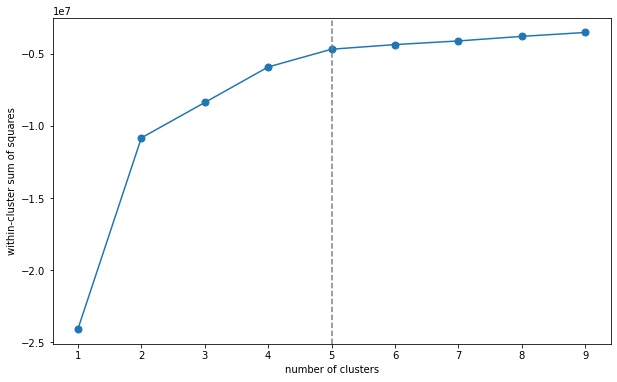

In [7]:
fig, ax = plt.subplots(figsize=[10, 6])

ax.plot(range(1, 10), wcss, marker='o', markersize=7)

ax.set_xlabel('number of clusters')
ax.set_ylabel('within-cluster sum of squares')
ax.axvline(5, color='gray', ls='--');

### 2.1 Vary n Clusters

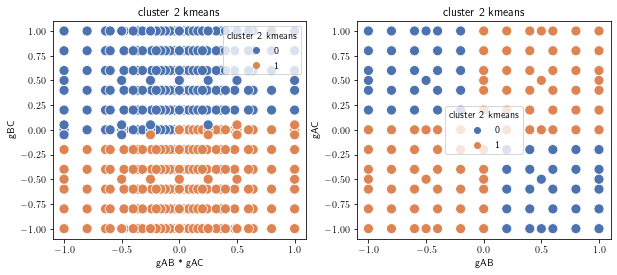

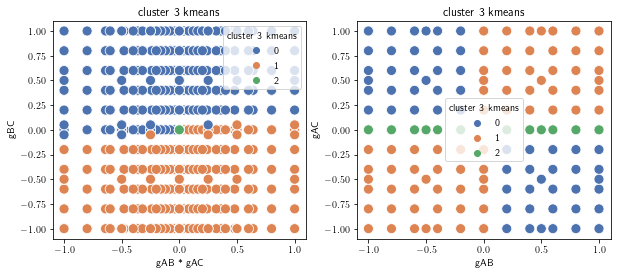

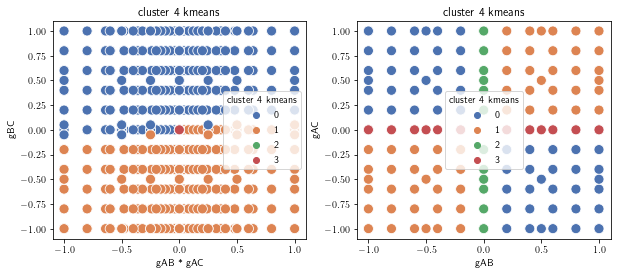

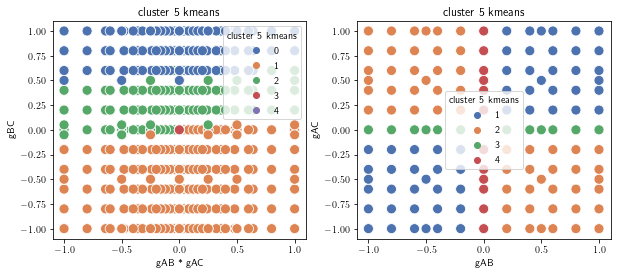

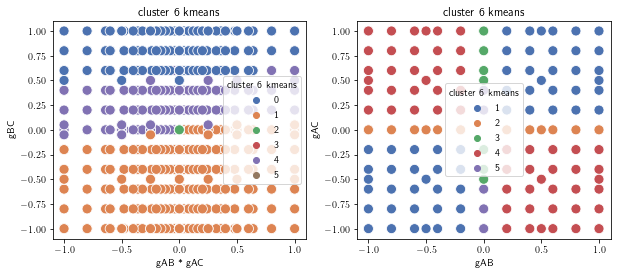

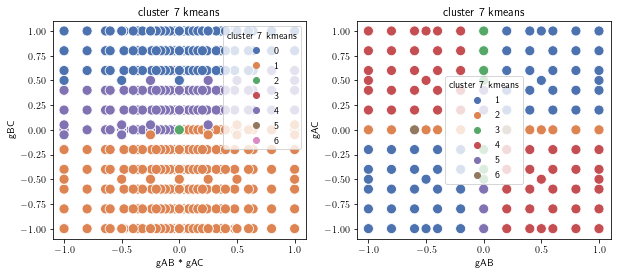

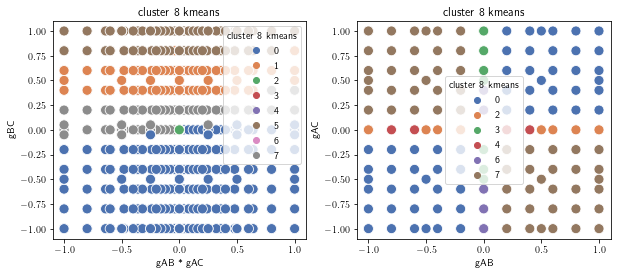

In [58]:
%matplotlib inline
for n_clusters in range(2, 9):

    model = KMeans(
        n_clusters=n_clusters,
        random_state=0
    )

    model.fit(features)

    df_red.loc[:, f'cluster {n_clusters} kmeans'] = model.labels_
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.scatterplot(
        x='gAB * gAC',
        y='gBC',
        hue=f'cluster {n_clusters} kmeans',
        data=df_red,
        palette='deep',
        alpha=1,
        ax=axes[0],
        s=100
    )
    axes[0].set_title(f'cluster {n_clusters} kmeans')
    
    sns.scatterplot(
        x='gAB',
        y='gAC',
        hue=f'cluster {n_clusters} kmeans',
        data=df_red.loc[df_red.loc[:, 'gBC']==0, :],
        palette='deep',
        alpha=1,
        ax=axes[1],
        s=100
    )
    axes[1].set_title(f'cluster {n_clusters} kmeans')
    
    
    
    plt.show()

### 2.2 Plot Examples

<IPython.core.display.Javascript object>


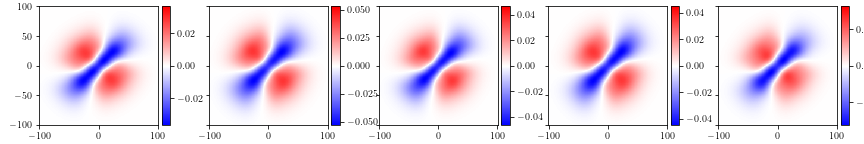

sample 0 gBB=0.0, gCC=0.0, gAB=-0.4, gAC=0.8, gBC=0.6 index: 4704
sample 1 gBB=0.0, gCC=0.0, gAB=0.6, gAC=0.2, gBC=1.0 index: 11329
sample 2 gBB=0.0, gCC=0.0, gAB=0.0, gAC=0.2, gBC=0.8 index: 7335
sample 3 gBB=0.0, gCC=0.0, gAB=0.8, gAC=-0.2, gBC=0.8 index: 12637
sample 4 gBB=0.0, gCC=0.0, gAB=0.6, gAC=0.8, gBC=0.6 index: 11360


In [90]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster 5 kmeans', cluster_id=0, seed=0)

<IPython.core.display.Javascript object>


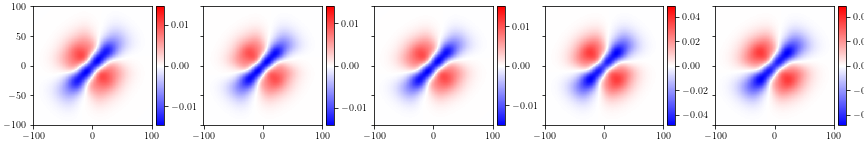

sample 0 gBB=0.0, gCC=0.0, gAB=0.6, gAC=-0.2, gBC=0.2 index: 11303
sample 1 gBB=0.0, gCC=0.0, gAB=0.0, gAC=-0.2, gBC=0.2 index: 7310
sample 2 gBB=0.0, gCC=0.0, gAB=-0.6, gAC=0.2, gBC=0.2 index: 3339
sample 3 gBB=0.0, gCC=0.0, gAB=-0.6, gAC=-0.8, gBC=0.8 index: 3287
sample 4 gBB=0.0, gCC=0.0, gAB=-0.8, gAC=-0.2, gBC=0.8 index: 1988


In [89]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster 5 kmeans', cluster_id=2, seed=0)

<IPython.core.display.Javascript object>


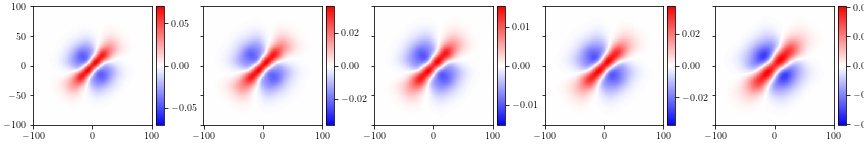

sample 0 gBB=0.0, gCC=0.0, gAB=-0.6, gAC=-1.0, gBC=-0.6 index: 3269
sample 1 gBB=0.0, gCC=0.0, gAB=-0.2, gAC=0.2, gBC=-0.4 index: 5998
sample 2 gBB=0.0, gCC=0.0, gAB=0.2, gAC=-0.8, gBC=-0.2 index: 8606
sample 3 gBB=0.0, gCC=0.0, gAB=0.4, gAC=0.6, gBC=-0.4 index: 10013
sample 4 gBB=0.0, gCC=0.0, gAB=0.8, gAC=0.8, gBC=-0.2 index: 12687


In [91]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster 5 kmeans', cluster_id=1, seed=0)

<IPython.core.display.Javascript object>


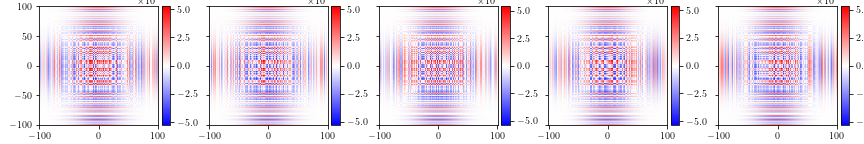

sample 0 gBB=0.0, gCC=0.0, gAB=0.0, gAC=0.8, gBC=0.0 index: 7364
sample 1 gBB=0.0, gCC=0.0, gAB=0.0, gAC=0.4, gBC=0.0 index: 7342
sample 2 gBB=0.0, gCC=0.0, gAB=0.0, gAC=-0.2, gBC=0.0 index: 7309
sample 3 gBB=0.0, gCC=0.0, gAB=0.0, gAC=-0.5, gBC=0.0 index: 16198
sample 4 gBB=0.0, gCC=0.0, gAB=0.0, gAC=-0.6, gBC=0.0 index: 7287


In [93]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster 5 kmeans', cluster_id=4, seed=0)

### 2.3 Further Checks

<IPython.core.display.Javascript object>


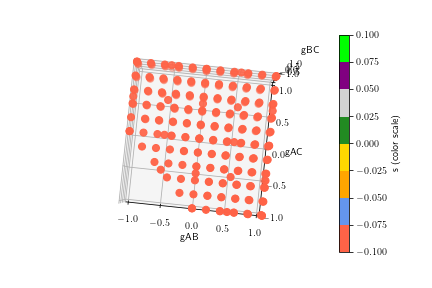

In [97]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use scatter, coloring by 's', with a colormap

colors = ['tomato', 'cornflowerblue', 'orange', 'gold', 'forestgreen', 'lightgray', 'purple', 'lime']

n_cluster = 5
# mask = df_red.loc[:, f'cluster {n_cluster} kmeans'] != -1
mask = df_red.loc[:, f'cluster {n_cluster} kmeans'] == 0
# mask = df_red.loc[:, 'gBC'].abs() < 0.1

sc = ax.scatter(
    df_red.loc[mask, 'gAB'],
    df_red.loc[mask, 'gAC'],
    df_red.loc[mask, 'gBC'],
    c=df_red.loc[mask, f'cluster {n_cluster} kmeans'],
    cmap=ListedColormap(colors),
    s=50
)

# Add colorbar to show 's' scale
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('s (color scale)')

ax.set_xlabel('gAB')
ax.set_ylabel('gAC')
ax.set_zlabel('gBC')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)



plt.show()


In [22]:
%matplotlib inline

## 3. DBSCAN

### 3.1 Hyperparameter tuning with K-Nearest Neighbours

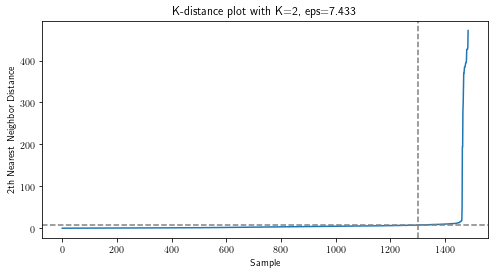

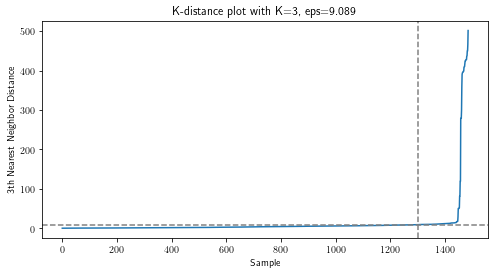

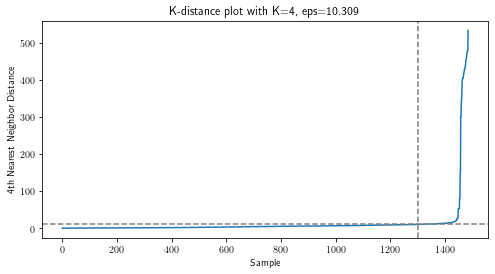

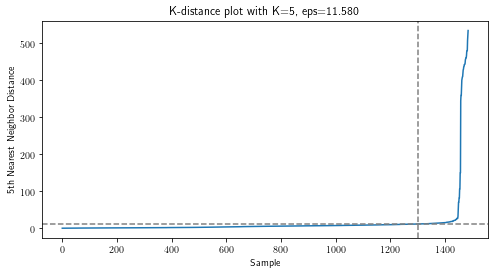

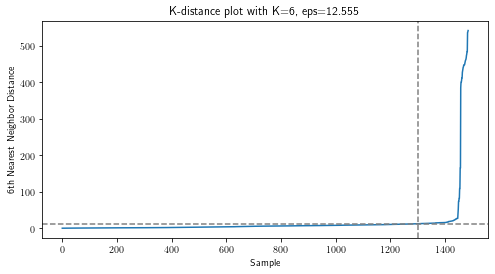

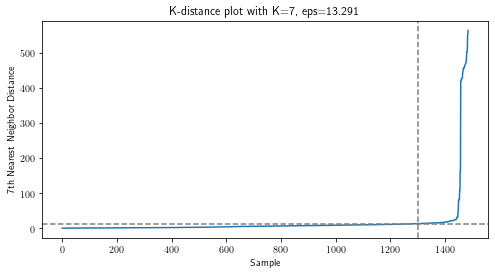

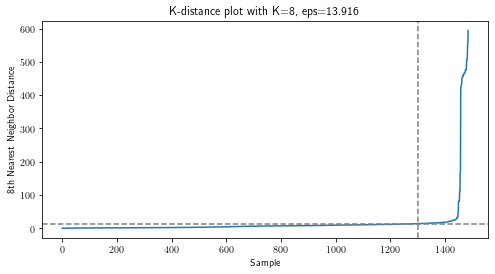

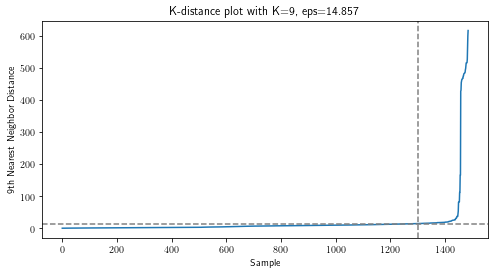

In [24]:
for k in range(2, 10):
    helper_fcts.plot_kNN_distance(features, k=k, elbowpoint=1300)


In [39]:
def evaluate_DBSCAN(min_samples, eps):
    """Make sns scatterplot for given hyperparameters.
    
    Args:
        min_samples (int): number of minimal samples for cluster
        eps (float): 
    
    
    """
    model_db = DBSCAN(eps=eps, min_samples=min_samples)
    model_db.fit(features)
    
    df_red.loc[:, f'cluster DBSCAN {min_samples} {int(eps)}'] = model_db.labels_

    # Scatterplot of data with obtained labels
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.scatterplot(
        x='gAB * gAC',
        y='gBC',
        hue=model_db.labels_,
        data=df_red,
        palette='deep',
        alpha=1,
        ax=axes[0],
        s=100
    )    
    
    mask_gBC0 = df_red.loc[:, 'gBC'] == 0
    sns.scatterplot(
        x='gAB',
        y='gAC',
        hue=model_db.labels_[mask_gBC0],
        data=df_red.loc[mask_gBC0, :],
        palette='deep',
        alpha=1,
        ax=axes[1],
        s=150
    )
    
    axes[0].set_title(f'min samples={min_samples}, seps={eps:.3f}', x=1)  
    
    plt.show()

<IPython.core.display.Javascript object>


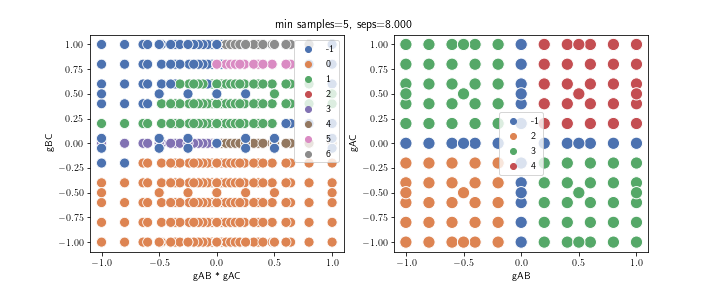

In [53]:
min_samples=5
eps=8

evaluate_DBSCAN(min_samples=min_samples, eps=eps)

<IPython.core.display.Javascript object>


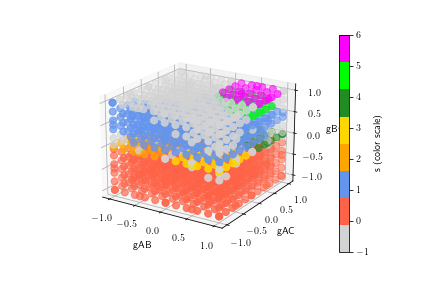

In [54]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use scatter, coloring by 's', with a colormap

colors = ['lightgray', 'tomato', 'cornflowerblue', 'orange', 'gold', 'forestgreen', 'lime', 'magenta']

sc = ax.scatter(
    df_red['gAB'],
    df_red['gAC'],
    df_red['gBC'],
    c=df_red[f'cluster DBSCAN {min_samples} {int(eps)}'],
    cmap=ListedColormap(colors),
    s=50
)

# Add colorbar to show 's' scale
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('s (color scale)')

ax.set_xlabel('gAB')
ax.set_ylabel('gAC')
ax.set_zlabel('gBC')


plt.show()

<IPython.core.display.Javascript object>


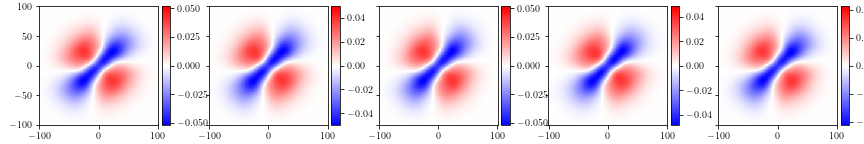

sample 0 gBB=0.0, gCC=0.0, gAB=0.2, gAC=0.8, gBC=1.0 index: 8700
sample 1 gBB=0.0, gCC=0.0, gAB=1.0, gAC=0.4, gBC=1.0 index: 14001
sample 2 gBB=0.0, gCC=0.0, gAB=0.8, gAC=0.2, gBC=1.0 index: 12660
sample 3 gBB=0.0, gCC=0.0, gAB=0.8, gAC=0.8, gBC=1.0 index: 12693
sample 4 gBB=0.0, gCC=0.0, gAB=0.4, gAC=0.4, gBC=1.0 index: 10009


In [56]:
helper_fcts.plot_5_random_cluster_examples(
    df_features=df_red,
    cluster_col=f'cluster DBSCAN {min_samples} {int(eps)}',
    cluster_id=6,
    seed=0
)

## 4 Summary


**K-Means**

We get the most *reasonable* results (the results which we would expect) for K-Means when considering 4 or 5 clusters. Now we describe the clusters in the case of 5 clusters:
- Appearance of a correlation patttern when $g_{BC}<-0.05$ as well as when $g_{BC}<0.05$ and $g_{AB}\cdot g_{AC}>0$. So there is a small margin where the induced attraction overcomes a repulsive $g_{BC}$.
- Two vanishing patterns when $g_{BC}$, and either $g_{AB}=0$ and/or $g_{AC}=0$.
- Anti-correlation when $g_{BC}>0.05$ as well as when $g_{BC}>-0.05$ and $g_{AB}\cdot g_{AC}<0$. Also here is a small margin where the induced repulsion overcomes a attractive $g_{BC}$.
- For 5 clusters: A separate cluster appears when $g_{BC}>0.5$ and $g_{AB}+g_{AC}>-0.5$.


**DBSCAN**

DBSCAN yields similar results as k-means. However, there are many outliers when $g_{BC}$ is large and the others $g_{AB}, g_{AC}$ are smaller.

**Conclusion**

All in all, k-means yields *visually* better results and seems more reliable.

